In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
bn_df = pd.read_csv('bn.csv').rename(columns={'Unnamed: 0' : 'tool'}).set_index('tool')
def newname (s) : 
  l = s.split("_")
  return (" ".join(l[:-1]),l[-1]) 
for cname in bn_df.columns :
  bn_df.rename(columns={cname: newname(cname)}, inplace=True)
bn_df.columns = pd.MultiIndex.from_tuples(bn_df.columns, names=['Experiment','Statistic'])
display(bn_df)

Experiment     asia 1                 asia 2            earthquake 1  \
Statistic        mean      stdev        mean      stdev         mean   
tool                                                                   
dappl        1.635103   0.282863    2.756469   0.338211     1.347468   
problog     28.619000  11.413209   53.360000   5.513257    15.207000   
derk        78.498147  40.821306  119.160538  20.701705    19.434001   

Experiment           earthquake 2               survey 1               \
Statistic      stdev         mean     stdev         mean        stdev   
tool                                                                    
dappl       0.140249     2.402236  0.189799     1.702092     0.166650   
problog     4.787009    33.185000  2.315054   274.359000   194.323597   
derk        5.608278    24.598331  4.541412  4020.848393  1096.329457   

Experiment   survey 2             
Statistic        mean      stdev  
tool                              
dappl         2.92691   0.184734  
problog     182.32000  43.183177  
derk              NaN        NaN

In [6]:
hmm_df = pd.read_csv('hmm.csv').rename(columns={'Unnamed: 0' : 'tool'}).set_index('tool')
for cname in hmm_df.columns :
  hmm_df.rename(columns={cname: (cname.split('_')[0],cname.split('_')[1])}, inplace=True)

In [7]:
x = list(set([int(a) for (a,_) in list(hmm_df.columns)]))
x.sort()
means = [(_,b) for (_,b) in hmm_df.columns if b == 'mean']
stdevs = [(_,b) for (_,b) in hmm_df.columns if b == 'stdev']
hmm_df_means = hmm_df[means]
hmm_df_stdevs = hmm_df[stdevs]

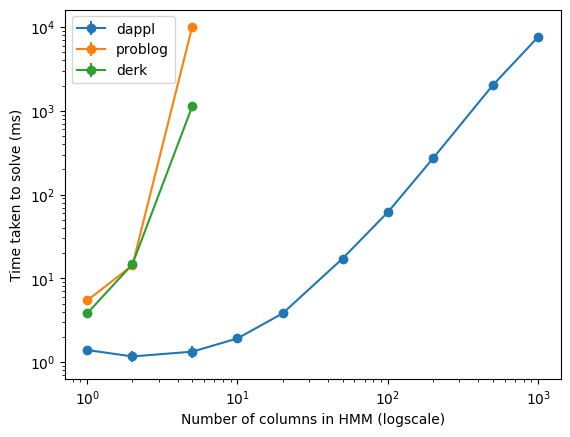

In [8]:
for row_name, row_data in hmm_df_means.iterrows() :
  y = row_data
  a = list(hmm_df_stdevs.loc[row_name])
  plt.errorbar(x, y, yerr=a, fmt='-o', label=row_name)

plt.xscale('log')
plt.yscale('log')

# Add labels
plt.xlabel('Number of columns in HMM, timeout=60000ms (logscale)')
plt.ylabel('Time taken to solve (ms)')
plt.legend()
plt.savefig('hmm.svg', format='svg')

# Show the plot
plt.show()

In [9]:
ladder_long = pd.read_csv('ladder_long.csv').rename(columns={'Unnamed: 0' : 'tool'}).set_index('tool')
for cname in ladder_long.columns :
  ladder_long.rename(columns={cname: (cname.split('_')[0],cname.split('_')[1])}, inplace=True)
x = list(set([int(a) for (a,_) in list(ladder_long.columns)]))
x.sort()
means = [(_,b) for (_,b) in ladder_long.columns if b == 'mean']
stdevs = [(_,b) for (_,b) in ladder_long.columns if b == 'stdev']
ladder_long_means = ladder_long[means]
ladder_long_stdevs = ladder_long[stdevs]

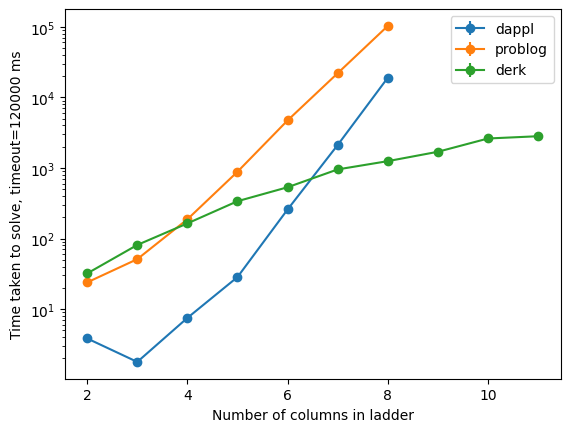

In [10]:
for row_name, row_data in ladder_long_means.iterrows() :
  y = row_data
  a = list(ladder_long_stdevs.loc[row_name])
  plt.errorbar(x, y, yerr=a, fmt='-o', label=row_name)

plt.yscale('log')

# Add labels
plt.xlabel('Number of columns in ladder')
plt.ylabel('Time taken to solve, timeout=120000 ms')
plt.legend()
plt.savefig('long_ladder.svg', format='svg')

# Show the plot
plt.show()

In [11]:
ladder_4 = pd.read_csv('ladder_4.csv').rename(columns={'Unnamed: 0' : 'tool'}).set_index('tool')
for cname in ladder_4.columns :
  ladder_4.rename(columns={cname: (cname.split('_')[0],cname.split('_')[1])}, inplace=True)
x = list(set([int(a) for (a,_) in list(ladder_4.columns)]))
x.sort()
means = [(_,b) for (_,b) in ladder_4.columns if b == 'mean']
stdevs = [(_,b) for (_,b) in ladder_4.columns if b == 'stdev']
ladder_4_means = ladder_4[means]
ladder_4_stdevs = ladder_4[stdevs]

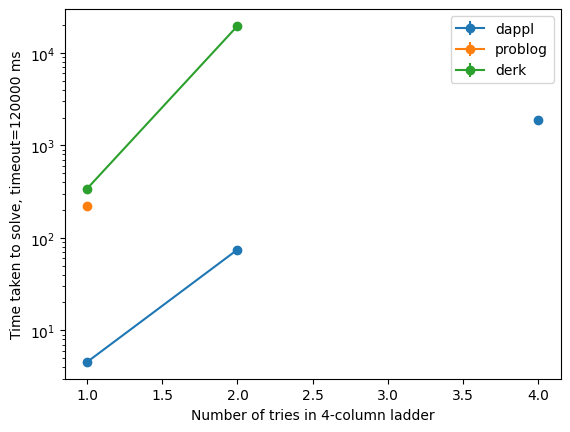

In [12]:
for row_name, row_data in ladder_4_means.iterrows() :
  y = row_data
  a = list(ladder_4_stdevs.loc[row_name])
  plt.errorbar(x, y, yerr=a, fmt='-o', label=row_name)

plt.yscale('log')

# Add labels
plt.xlabel('Number of tries in 4-column ladder')
plt.ylabel('Time taken to solve, timeout=120000 ms')
plt.legend()
plt.savefig('ladder_3.svg', format='svg')

# Show the plot
plt.show()

In [17]:
ladder_3 = pd.read_csv('ladder_3.csv').rename(columns={'Unnamed: 0' : 'tool'}).set_index('tool')
for cname in ladder_3.columns :
  ladder_3.rename(columns={cname: (cname.split('_')[0],cname.split('_')[1])}, inplace=True)
x = list(set([int(a) for (a,_) in list(ladder_3.columns)]))
x.sort()
means = [(_,b) for (_,b) in ladder_3.columns if b == 'mean']
stdevs = [(_,b) for (_,b) in ladder_3.columns if b == 'stdev']
ladder_3_means = ladder_3[means]
ladder_3_stdevs = ladder_3[stdevs]

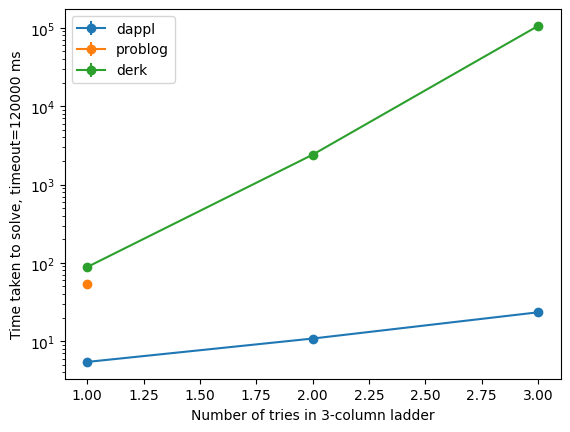

In [18]:
for row_name, row_data in ladder_3_means.iterrows() :
  y = row_data
  a = list(ladder_3_stdevs.loc[row_name])
  plt.errorbar(x, y, yerr=a, fmt='-o', label=row_name)

plt.yscale('log')

# Add labels
plt.xlabel('Number of tries in 3-column ladder')
plt.ylabel('Time taken to solve, timeout=120000 ms')
plt.legend()
plt.savefig('ladder_4.svg', format='svg')

# Show the plot
plt.show()